In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [47]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [48]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [55]:
data['diagnosis'] = data['diagnosis'].astype('category')
data['diagnosis'].dtype

CategoricalDtype(categories=['B', 'M'], ordered=False)

In [56]:
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [57]:
data = data.drop(labels = 'id', axis = 1)
data = data.drop(labels = 'Unnamed: 32', axis = 1)

In [58]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [59]:
x = data.drop(labels='diagnosis', axis = 1)
y = data['diagnosis']

In [60]:
from scipy.stats import zscore

In [61]:
xscaled = x.apply(zscore)

In [62]:
xscaled.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-8.226187e-16,2.419467e-16,-1.315097e-16,-8.780323e-17,1.957036e-16,5.073075e-16,...,-7.956924e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17,-2.251665e-16,-2.579464e-16,1.143393e-16,3.203842e-16,1.783381e-16,-6.436952e-16
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


In [63]:
xscaled_df = pd.DataFrame(xscaled)

## Model

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_test, y_train, y_test = train_test_split(xscaled_df, y, test_size = 0.3, random_state = 1)

In [66]:
x_train.head()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
249,-0.740508,-1.014519,-0.745503,-0.707013,0.351537,-0.497685,-0.571494,-0.506314,0.260609,-0.158433,...,-0.749471,-0.730716,-0.785787,-0.683447,0.286310,-0.611108,-0.440357,-0.282091,-0.383019,-0.324505
58,-0.305966,0.004736,-0.385500,-0.363161,-1.121587,-1.259344,-1.106185,-1.154336,0.026949,-1.103975,...,-0.422281,-0.558102,-0.506991,-0.450875,-1.326851,-1.223647,-1.296979,-1.575895,-0.747019,-1.166825
476,0.020650,0.288638,0.018164,-0.103779,-0.501736,0.122408,-0.479215,-0.473040,-1.115796,-0.383832,...,0.037443,0.257745,0.144127,-0.091558,-0.748217,0.563842,-0.100693,0.293779,-0.593330,-0.297351
529,-0.584300,-1.361252,-0.582390,-0.596377,0.970677,-0.270077,-0.640169,-0.540104,-0.564504,0.465313,...,-0.583805,-1.613330,-0.605880,-0.581312,0.864944,-0.579301,-0.527672,-0.619360,-0.193738,-0.189844
422,-0.714947,-0.760869,-0.680010,-0.701609,0.885278,0.236117,-0.223847,-0.101864,0.271562,0.057043,...,-0.751542,-0.978239,-0.754511,-0.711749,0.400283,-0.237058,-0.201441,-0.062524,-0.184032,-0.536193


In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
KNN = KNeighborsClassifier(n_neighbors=5, weights='distance')

In [69]:
KNN.fit(x_train, y_train)

KNeighborsClassifier(weights='distance')

In [70]:
 KNN_predict = KNN.predict(x_test)

In [77]:
KNN_predict
KNN.score(x_test, y_test)

0.9532163742690059

In [72]:
from sklearn.metrics import confusion_matrix

In [82]:
cm = metrics.confusion_matrix(y_test, KNN_predict, labels = ['M','B'])

<IPython.core.display.Javascript object>

<AxesSubplot:>

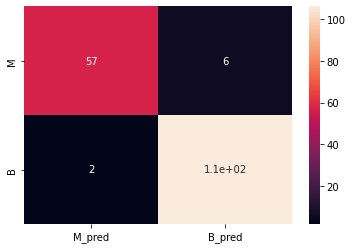

In [83]:
cm_df = pd.DataFrame(cm, index = [i for i in['M','B']], columns=[i for i in ['M_pred','B_pred']])
sns.heatmap(cm_df, annot = True)

In [95]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(metrics.classification_report(y_test, KNN_predict))

<IPython.core.display.Javascript object>

              precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



## Choosing K values

In [97]:
from sklearn.model_selection import cross_val_score

score_1 = [] 

for i in range(1,50):
    KNN_2 = KNeighborsClassifier(n_neighbors=i)
    score_2 = cross_val_score(KNN_2, xscaled_df, y, cv=10) #cv je broj iteracija, koliko puta isporba model, pa dobijamo niz. zato ispod trazimo mean()
    score_1.append(score_2.mean())


Text(0.5, 1.0, 'Accuracy rate vs K values')

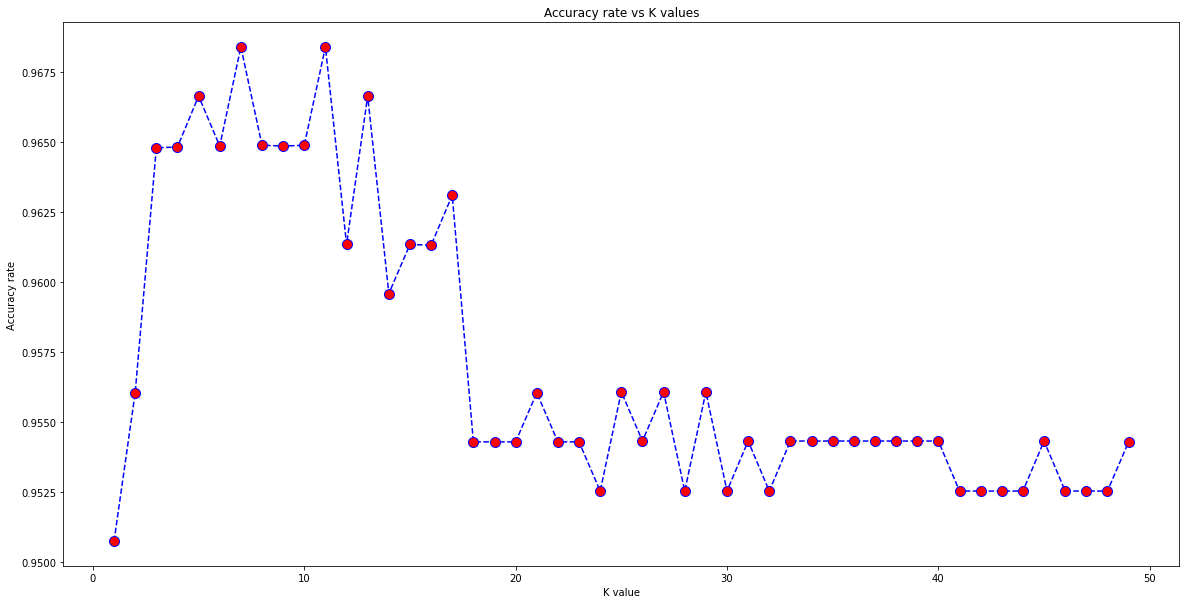

In [107]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50), score_1, color='blue', linestyle='dashed',marker='o',markerfacecolor='red', markersize = 10)
plt.ylabel('Accuracy rate')
plt.xlabel('K value')
plt.title('Accuracy rate vs K values')

In [110]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=9)

In [111]:
prediction = model.predict(x_test)

In [116]:
cm1 = metrics.confusion_matrix(y_test, prediction, labels=['M','B'])

<IPython.core.display.Javascript object>

<AxesSubplot:>

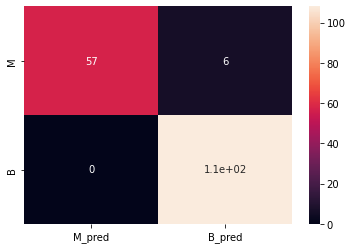

In [117]:
cm1_df = pd.DataFrame(cm1, index=[i for i in ['M','B']], columns=[i for i in ['M_pred','B_pred']])
sns.heatmap(cm1_df, annot=True)

In [118]:
model.score(x_test, y_test)

0.9649122807017544

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.model_selection import cross_val_score


In [3]:
for k in range(1,50):
    

SyntaxError: invalid syntax (2783940174.py, line 1)